# Classification Task Instruction
In this task, you will get a sense of using Python to solve a classification problem.
The [dataset](https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction) that we will be working with is from the Taiwanese Strock Exchange about the bankruptcy of various companies.   
````
 Goal: to predict, if a company is bankrupt (denoted in **variable y**) or not.
````

Remember that this is an artifical use case which is supposed to serve a **Contributor level** purposes. Thereafter, you should practice skills such as **Data Preprocessing, Data Visualisation, Preparing Data for ML** and only after you receive feedback on your initial work it is recommended to try **to fit some baseline Machine Learning Model**.

**Dataset citation:**
[[Liang et al., 2016] Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

# Task

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

## Step 1

**Step 1: Data Loading & Preprocessing**
- load the dataset into your Python Notebook
- convert the dataset to the desired format that you want to work with (dataframe, numpy.array, list, etc.)
- explore the dataset
- observe the variables carefully, and try to understand each variable and its business value
- don't forget the special treatment to null values

In [2]:
zf = zipfile.ZipFile('Data/Company_Bankruptcy.zip') 
df = pd.read_csv(zf.open('Company_Bankruptcy.csv'))

##### 1.0 - Making familiar with the data

In [3]:
# 11 years of data -> ~600 entries per year?
df.shape

(6819, 96)

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
# good economic features, but key information is missing: 
# - unique identifier (are companies multiple times in the data?)
# - date (or is it an average of 11 years per company)
# - industry, market interest rates (e.g. inter bank swap rates) 
# - Interest-bearing debt interest rates without the market interest rate is not very useful
df.columns.to_list()

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

Screening the web for more information on the data set was not successful:
- The page: https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction the data is copied from only mentions: 'The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.'
- The kaggle page: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/data includes no further information neither
- The page of 'Taiwan Economic Journal' seems to be offline

Conclusion: nice data frame, economic value unfortunately questionable as key information is not available. description of features is also not available such that a sound economic model will not be feasible, but we try to make the best out of it. Some features are very likely having very high dependencies by definition(?) (ROA A-C)

##### 1.1 - Checking columns and data types

In [6]:
# only numbers
len(df.select_dtypes(include='number').columns), df.shape

(96, (6819, 96))

In [7]:
# no NAs
df.isnull().sum().sum()

0

only integers / floats with no NAs -> super clean data set!

## Step 2

**Step 2: Data Visualisation & Exploration**
- employ various visualisation skills that you acquired inside and outside the classroom
- with the visualisation tools, understand what is happening in the dataset


In [8]:
feat_int=df.select_dtypes(include='int').columns
feat_int

Index(['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'], dtype='object')

In [9]:
feat_float=df.select_dtypes(include='float').columns
len(feat_float)

93

### integer features

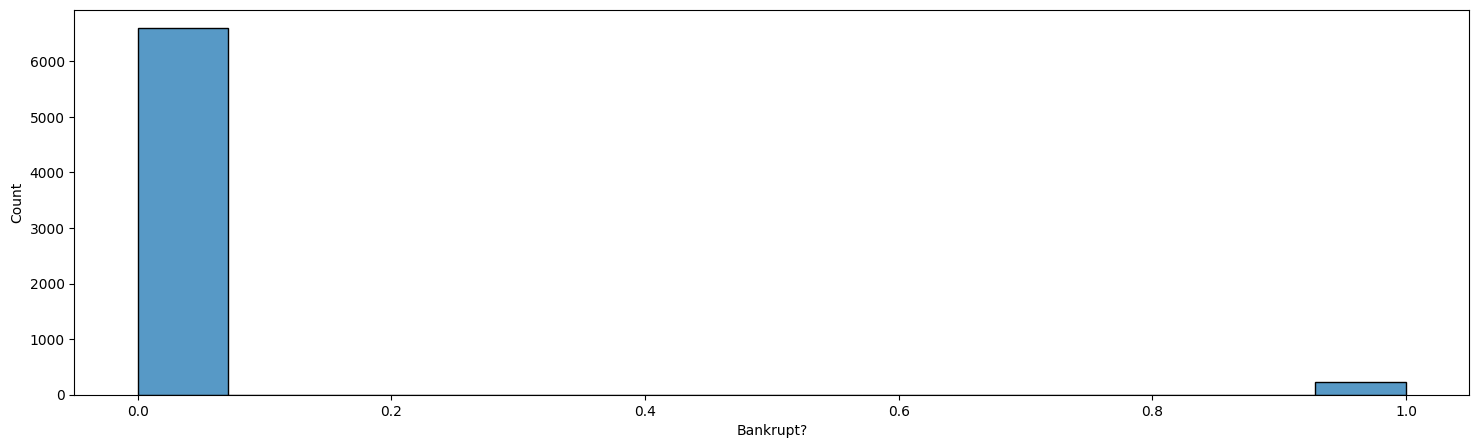

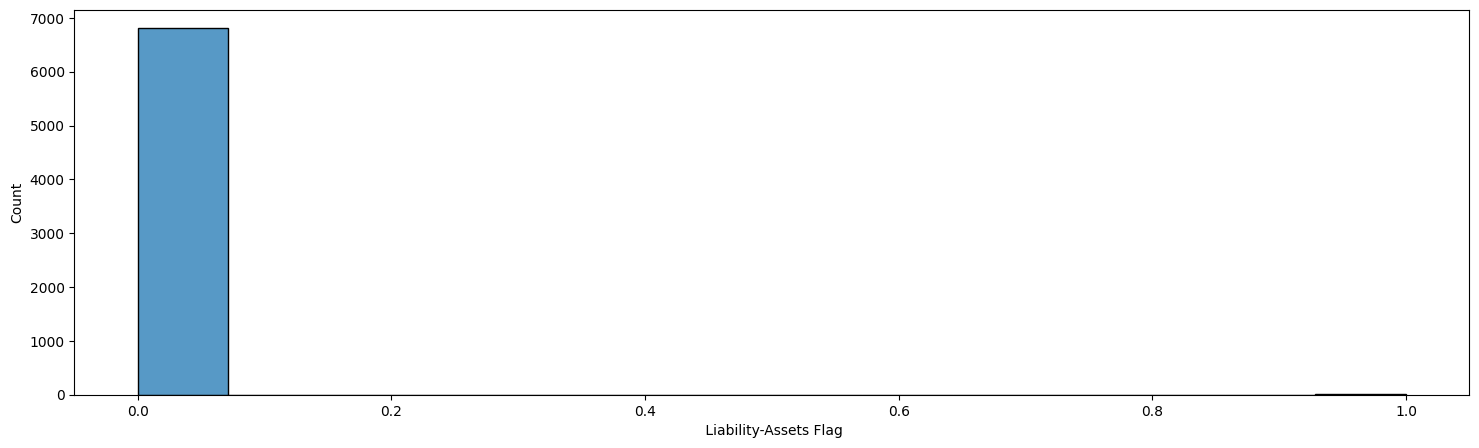

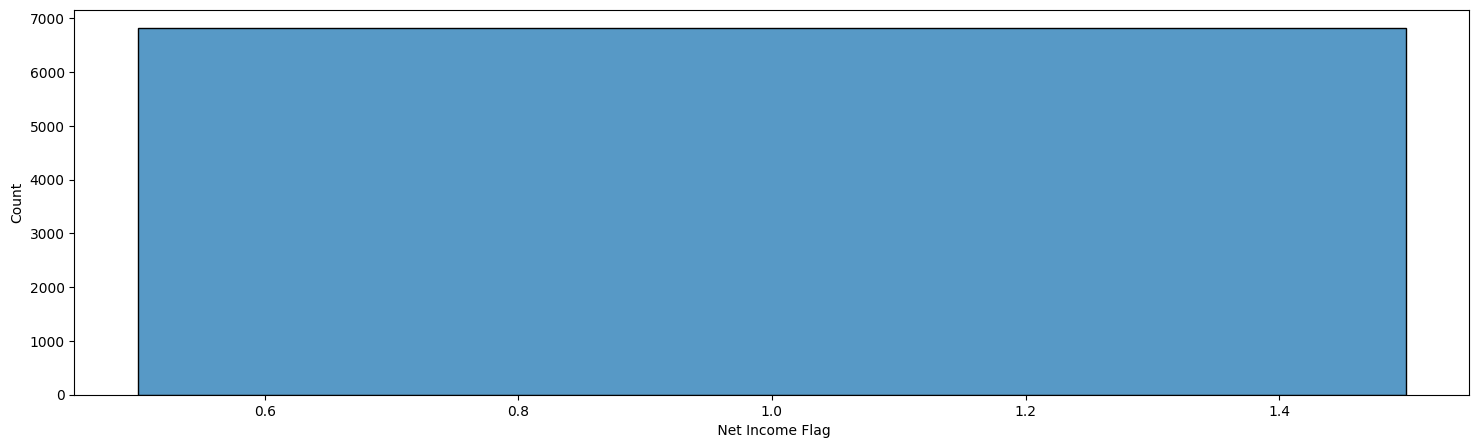

In [10]:
for col in feat_int:
    plt.figure(figsize=(18,5))
    # plt.subplot(1,2,1)
    # sns.distplot(df[col])
    sns.histplot(df[col])
    # plt.subplot(1,2,2)
    # sns.boxplot(x=col, data=df)
    plt.show()

In [11]:
df[' Net Income Flag'].describe()

count    6819.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name:  Net Income Flag, dtype: float64

only binary features; Net Income Flag is always 1 -> will be removed

### float features
there are too many to plot all of them. we first produce some statistics and focus on the most interesting ones

In [12]:
df_min = df[feat_float].describe().loc[['min']]

# min is always 0
df_min.transpose().describe()

,min
count,93.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [13]:
# all of them have max at least 1 -> no constant columns, but very different scales
df_max=df[feat_float].describe().loc[['max']]
df_max.transpose().describe()

,max
count,9.300000e+01
mean,2.248495e+09
std,4.040363e+09
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,9.900000e+08
max,1.000000e+10


In [14]:
df_float=df[feat_float].copy(deep=True)

#### outlier detection

In [15]:
# to get an impression what is 'possible' with very fat tailed distributions
print(stats.t(2).ppf(0.999)/stats.t(2).ppf(0.95))
print(stats.lognorm(1).ppf(0.999)/stats.lognorm(1).ppf(0.95))
print(stats.pareto(1).ppf(0.999)/stats.pareto(1).ppf(0.95))

7.646313365443754
4.243458748240554
50.0


In [16]:
# there are obviously some features with very unrealistic values (ratios with e+10) -> we will cap them
ratio=df_float.quantile(0.999)/df_float.quantile(0.95)
ratio[ratio>10].sort_values(ascending=False)

 Accounts Receivable Turnover             1.210293e+12
 Interest-bearing debt interest rate      7.773298e+11
 Inventory/Current Liability              3.454543e+11
 Total assets to GNP price                2.763521e+11
 Long-term Liability to Current Assets    2.506124e+11
 Average Collection Days                  2.504877e+11
 Cash/Current Liability                   1.539342e+11
 Allocation rate per person               1.269640e+11
 Quick Ratio                              1.180047e+11
 Total debt/Total net worth               2.691809e+10
 Net Value Growth Rate                    2.814730e+01
 Long-term fund suitability ratio (A)     2.800439e+01
dtype: float64

In [17]:
# clipping outliers with a ratio of 100 of the 95% quantile
feat_float_outliers=ratio[ratio>10].index
caps=df_float[feat_float_outliers].quantile(0.95)*100
df_float[feat_float_outliers]=df_float[feat_float_outliers].clip(upper=caps, axis=1)
# check again
ratio=df_float.quantile(0.999)/df_float.quantile(0.95)
ratio[ratio>10].sort_values(ascending=False)

 Interest-bearing debt interest rate      100.000000
 Quick Ratio                              100.000000
 Total debt/Total net worth               100.000000
 Accounts Receivable Turnover             100.000000
 Average Collection Days                  100.000000
 Allocation rate per person               100.000000
 Cash/Current Liability                   100.000000
 Inventory/Current Liability              100.000000
 Long-term Liability to Current Assets    100.000000
 Total assets to GNP price                100.000000
 Net Value Growth Rate                     28.147300
 Long-term fund suitability ratio (A)      28.004392
dtype: float64

#### further inspection

<Axes: >

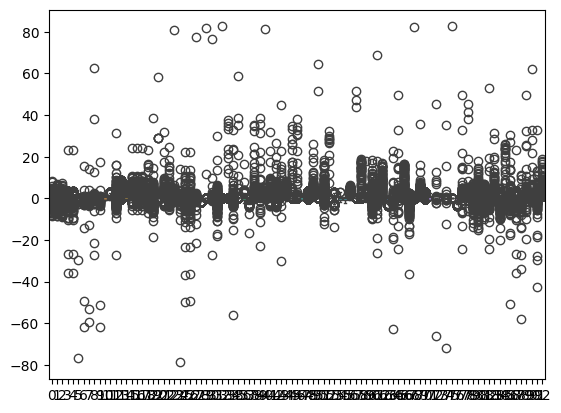

In [18]:
# to see if the outlier removal will change the picture fundamentally -> no
scaler_standard = StandardScaler()
scaler_standard.fit(df[feat_float])

df_float_scaled_standard_beforeoutlier = scaler_standard.transform(df[feat_float])
sns.boxplot(data=df_float_scaled_standard_beforeoutlier)

<Axes: >

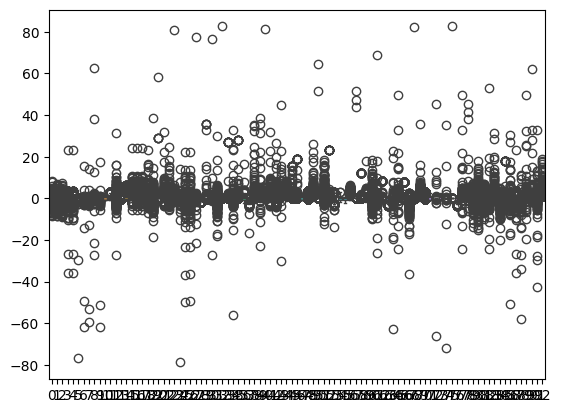

In [19]:
scaler_standard.fit(df_float)

df_float_scaled_standard_afteroutlier = scaler_standard.transform(df_float)
sns.boxplot(data=df_float_scaled_standard_afteroutlier)

<Axes: >

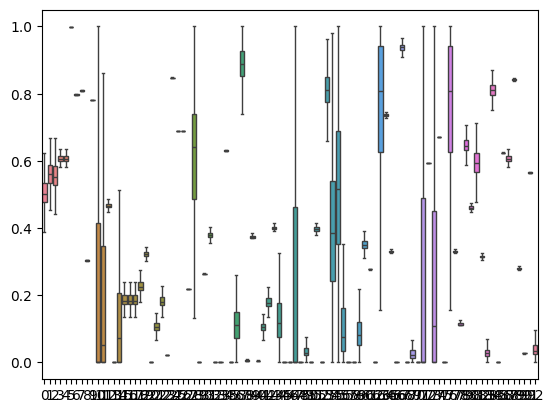

In [20]:
# to see if the outlier removal will change the picture fundamentally -> no
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(df[feat_float])

df_float_scaled_minmax_beforeoutlier = scaler_minmax.transform(df[feat_float])
sns.boxplot(data=df_float_scaled_minmax_beforeoutlier,showfliers=False)

<Axes: >

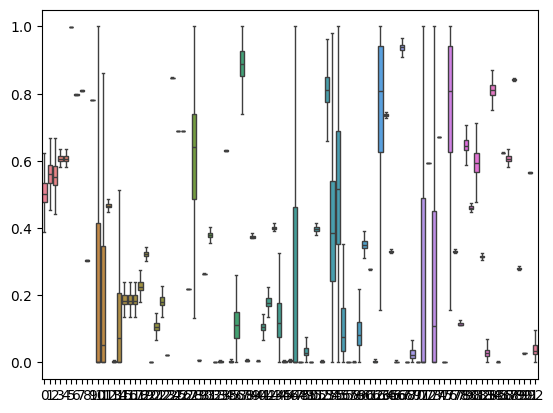

In [21]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(df_float)

df_float_scaled_minmax_afteroutlier = scaler_minmax.transform(df_float)
sns.boxplot(data=df_float_scaled_minmax_afteroutlier,showfliers=False)

In [22]:
# to be honest, some columns have very strange distributions, e.g. 'Gross Profit to Sales' which has a huge mass around (but not equal to!) 60%. we ignore these findings, we cannot repair data gathering.
df_float_scaled_minmax_afteroutlier=pd.DataFrame(df_float_scaled_minmax_afteroutlier, columns=feat_float)
df_float_scaled_minmax_afteroutlier.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.031506,0.807760,0.005825,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.030845,0.040332,0.055107,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.018034,0.796750,0.000302,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.027597,0.810619,0.000698,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.038375,0.826455,0.001764,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### finally used data after univariate analysis

In [23]:
data=pd.concat([df[['Bankrupt?', ' Liability-Assets Flag']],df_float_scaled_minmax_afteroutlier],axis=1)

In [24]:
data.shape, df.shape

((6819, 95), (6819, 96))

### binary analysis

In [25]:
data_corr=data.corr()

In [26]:
data_corr.head()

,Bankrupt?,Liability-Assets Flag,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,0.139212,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,...,0.171306,-0.315457,0.038541,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,-0.083048
Liability-Assets Flag,0.139212,1.000000,-0.109272,-0.156890,-0.120680,-0.032930,-0.032920,-0.000295,-0.003163,-0.002746,...,0.247158,-0.169104,0.075404,-0.023927,-0.032932,0.192688,-0.229559,-0.001717,-0.000974,-0.027573
ROA(C) before interest and depreciation before interest,-0.260807,-0.109272,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,...,-0.160725,0.887670,-0.098782,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,-0.282941,-0.156890,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,...,-0.195673,0.961552,-0.129992,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,-0.120680,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,...,-0.162572,0.912040,-0.116068,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,0.056430


there are too many features to display it with a heatmap, thus we search for the highest correlations and drop the corresponding features

In [27]:
def correlation(dataset, threshold):
    # Create dictionary for correlated columns
    correlated_dict = {}
    # Compute correlation 
    corr_matrix = dataset.corr()
    for c in range(len(corr_matrix.columns)):
        for j in range(c):
            # Take absolute correlation coefficient value 
            # If abs values are above threshold ...
            if abs(corr_matrix.iloc[c, j]) > threshold: 
                # ... Get name of column
                colname_c = corr_matrix.columns[c]
                colname_j = corr_matrix.columns[j]
                # Add to dictionary
                if colname_c not in correlated_dict:
                    correlated_dict[colname_c] = [colname_j]
                else:
                    correlated_dict[colname_c].append(colname_j)
    return correlated_dict

In [28]:
highly_correlated_features = correlation(dataset=data,threshold=0.95)
highly_correlated_features

{' ROA(B) before interest and depreciation after tax': [' ROA(C) before interest and depreciation before interest',
  ' ROA(A) before interest and % after tax'],
 ' Realized Sales Gross Margin': [' Operating Gross Margin'],
 ' After-tax net Interest Rate': [' Pre-tax net Interest Rate'],
 ' Continuous interest rate (after tax)': [' Pre-tax net Interest Rate',
  ' After-tax net Interest Rate'],
 ' Net Value Per Share (A)': [' Net Value Per Share (B)'],
 ' Net Value Per Share (C)': [' Net Value Per Share (B)',
  ' Net Value Per Share (A)'],
 ' Per Share Net profit before tax (Yuan ¥)': [' Persistent EPS in the Last Four Seasons'],
 ' Regular Net Profit Growth Rate': [' After-tax Net Profit Growth Rate'],
 ' Net worth/Assets': [' Debt ratio %'],
 ' Operating profit/Paid-in capital': [' Operating Profit Per Share (Yuan ¥)'],
 ' Net profit before tax/Paid-in capital': [' Persistent EPS in the Last Four Seasons',
  ' Per Share Net profit before tax (Yuan ¥)'],
 ' Current Liability to Liabili

In [29]:
# now we are getting rid of all features that are values in the dictionary
# Merge all values of the dictionary into a list
columns_to_drop = [item for sublist in highly_correlated_features.values() for item in sublist]
columns_to_drop


[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' Operating Gross Margin',
 ' Pre-tax net Interest Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Persistent EPS in the Last Four Seasons',
 ' After-tax Net Profit Growth Rate',
 ' Debt ratio %',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Current Liabilities/Liability',
 ' Current Liabilities/Equity',
 ' ROA(A) before interest and % after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Borrowing dependency',
 ' Current Liabilities/Equity',
 ' Current Liability to Equity']

### finally used data set

In [30]:
# Now drop these columns which are too highly correlated
data_cleaned = data.drop(columns=columns_to_drop)

In [31]:
data_cleaned.shape

(6819, 78)

## Step 3

**Step 3: Data modelling**
- separate variables & labels
- split dataset into training & testing dataset
- pick one data modelling approach respectively the Python modelling package that you would like to use
- fit the training dataset to the model and train the model
- output the model 
- make prediction on testing dataset


In [111]:
y=data_cleaned['Bankrupt?']
X=data_cleaned.drop(columns=['Bankrupt?'])
y=y.rename('label')

In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

### train / test split

In [112]:
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=42)

### RandomForestClassifier

In [35]:
# # Random Forest Classifier - Randomized Search for Hyperparameter Tuning
# rfc=RandomForestClassifier()
# # Define hyperparameter search space
# param_dist = {
#     'n_estimators': np.arange(50, 201, 10),  # Number of trees in the forest
#     'max_depth': np.arange(2, 16, 2),    # Maximum depth of each tree
#     'min_samples_split': np.arange(16, 256),  # Minimum number of samples required to split an internal node
#     'min_samples_leaf':  np.arange(2, 16)     # Minimum number of samples required to be at a leaf node
# }

# # Perform randomized search for hyperparameter tuning
# random_search = RandomizedSearchCV(
#     rfc,
#     scoring='recall',
#     param_distributions=param_dist,
#     n_iter=2000,  # Number of random combinations to try
#     cv=3,        # Cross-validation folds
#     verbose=2,
#     random_state=684,
#     n_jobs=-1
# )

# # Fit the model to the data
# random_search.fit(X_train, y_train)

# # Cross-validated score (more robust than holdout set most likely)
# print(random_search.best_score_)
# print(random_search.best_params_)


In [113]:
# params=random_search.best_params_
# resulting hyper parameters hard coded:
params={'n_estimators': 180, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_depth': 14}
rfc=RandomForestClassifier(**params)
rfc.fit(X_train, y_train)
y_train_pr=rfc.predict(X_train)
y_test_pr=rfc.predict(X_test)

<Axes: ylabel='Count'>

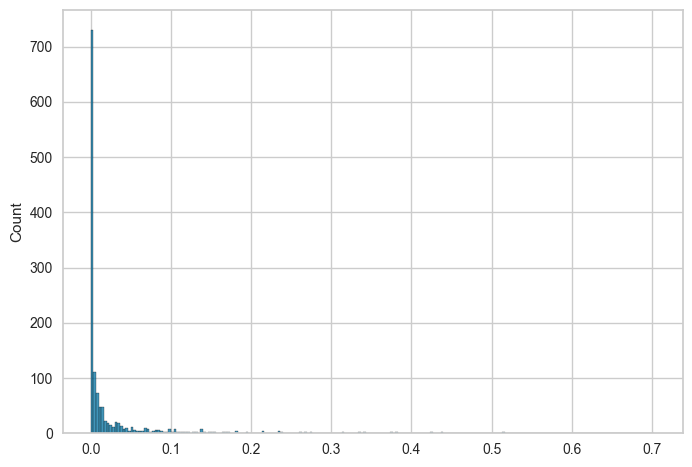

In [114]:
sns.histplot(rfc.predict_proba(X_test)[:,1])

In [115]:
print('Recall train: ' + str(recall_score(y_train, y_train_pr)))
print('Recall test: ' + str(recall_score(y_test, y_test_pr)))
print('Precision train: ' + str(precision_score(y_train, y_train_pr)))
print('Precision test: ' + str(precision_score(y_test, y_test_pr)))

Recall train: 0.39644970414201186
Recall test: 0.13725490196078433
Precision train: 1.0
Precision test: 0.875


In [116]:
confusion_matrix(y_train, y_train_pr)

array([[5286,    0],
       [ 102,   67]], dtype=int64)

In [117]:
confusion_matrix(y_test, y_test_pr)

array([[1312,    1],
       [  44,    7]], dtype=int64)

In [118]:
feat_importances=rfc.feature_importances_
feat_importances=pd.Series(feat_importances, index=X.columns)

In [119]:
# whatever  Net Value Growth Rate is, it is the most important feature according to feature importance, the next 2/3 features are more reasonable
feat_importances.sort_values(ascending=False).head(10)

 Net Value Growth Rate                                0.052894
 Net Income to Stockholder's Equity                   0.048033
 Net profit before tax/Paid-in capital                0.039557
 Net Value Per Share (C)                              0.037135
 Net worth/Assets                                     0.033260
 Net Income to Total Assets                           0.031709
 Equity to Liability                                  0.030275
 Working Capital/Equity                               0.029644
 Interest Expense Ratio                               0.026789
 ROA(B) before interest and depreciation after tax    0.025718
dtype: float64

In [120]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

In [123]:
# the most important features according to permutation importance seem to be reasonable
forest_importances.sort_values(ascending=False).head(10)


 Retained Earnings to Total Assets              0.002126
 Non-industry income and expenditure/revenue    0.002053
 Continuous interest rate (after tax)           0.002053
 Net worth/Assets                               0.001906
 Net Income to Total Assets                     0.001906
 Working Capital to Total Assets                0.001906
 Net Value Per Share (C)                        0.001613
 Total Asset Return Growth Rate Ratio           0.001466
 Net Value Growth Rate                          0.001466
 Interest-bearing debt interest rate            0.001466
dtype: float64

## Step 2 + 3 as a pipeline

In [41]:
y=df['Bankrupt?']
X=df.drop(columns=['Bankrupt?',' Net Income Flag']) # dropping in a pipeline is possible but the feature names receive 'remainder__' by default
y=y.rename('label')

### train-test split

In [42]:
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=42)

### feature engineering

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, quantile_ratio=100, upper_quantile=0.95):
        self.quantile_ratio = quantile_ratio
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        # Calculate the ratio of the 99.9% quantile to the 95% quantile
        ratio = X.quantile(0.999) / X.quantile(self.upper_quantile)
        # Identify columns where the ratio is greater than the threshold
        self.columns_to_clip = ratio[ratio > self.quantile_ratio].index
        # Calculate the upper cap for each column
        self.caps = X[self.columns_to_clip].quantile(self.upper_quantile) * 100
        return self

    def transform(self, X):
        # Clip outliers
        X[self.columns_to_clip] = X[self.columns_to_clip].clip(upper=self.caps, axis=1)
        return X

In [45]:
class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold

    def fit(self, X, y=None):
        # Compute correlation matrix
        corr_matrix = X.corr().abs()
        # Select upper triangle of correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
        # Find index of feature columns with correlation greater than threshold
        self.to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return self

    def transform(self, X):
        # Drop highly correlated columns
        X = X.drop(self.to_drop, axis=1)
        return X

In [46]:
# Define the pipeline for feature engineering
feature_engineering = Pipeline(steps=[
    ('outlier_clipper', OutlierClipper()),
    ('correlation_filter', CorrelationFilter())
])

# Define the column transformer
feature_engineering_outlier_clipper = ColumnTransformer(
    transformers=[
        ('outlier_clipper', OutlierClipper(), X_train.columns),
        # ('correlation_filter', CorrelationFilter(), list(X_train.columns))
    ],
    remainder='passthrough'
)

# Define the column transformer
feature_engineering_correlation_filter = ColumnTransformer(
    transformers=[
        # ('outlier_clipper', OutlierClipper(), X_train.columns),
        ('correlation_filter', CorrelationFilter(), list(X_train.columns))
    ],
    remainder='passthrough'
)



In [47]:
# check if clipping pipeline does what it should
X_train_transformed=feature_engineering_outlier_clipper.fit_transform(X_train)
X_train_transformed=pd.DataFrame(X_train_transformed, columns=X_train.columns)
ratio=X_train_transformed.quantile(0.999)/X_train_transformed.quantile(0.95)
ratio[ratio>10].sort_values(ascending=False)


 Interest-bearing debt interest rate      100.000000
 Total debt/Total net worth               100.000000
 Accounts Receivable Turnover             100.000000
 Average Collection Days                  100.000000
 Allocation rate per person               100.000000
 Cash/Current Liability                   100.000000
 Inventory/Current Liability              100.000000
 Long-term Liability to Current Assets    100.000000
 Total assets to GNP price                100.000000
 Quick Ratio                               21.534265
 Long-term fund suitability ratio (A)      21.190131
 Net Value Growth Rate                     15.377943
dtype: float64

In [48]:
# check if the correlation filter does what it should
# Define and fit the correlation filter
correlation_filter = CorrelationFilter()
correlation_filter.fit(X_train)
# Get the names of the dropped columns
dropped_columns = correlation_filter.to_drop
# Fit and transform the data
X_train_transformed = feature_engineering_correlation_filter.fit_transform(X_train)
# Get the names of all original columns
original_columns = list(X_train.columns)
# Get the names of the remaining columns
remaining_columns = [col for col in original_columns if col not in dropped_columns]
X_train_transformed=pd.DataFrame(X_train_transformed, columns=remaining_columns)
print('unclear why they are not identical: ' + str(X_train_transformed.equals(X_train[remaining_columns].reset_index(drop=True))))
print('numerically they are the same: ' + str(X_train_transformed.sub(X_train[remaining_columns].reset_index(drop=True)).abs().max().max()))
print('columnnames are identical: ' + str(list(X_train_transformed.columns) == list(X_train[remaining_columns].columns)))


unclear why they are not identical: False
numerically they are the same: 0.0
columnnames are identical: True


In [49]:
correlation_filter = CorrelationFilter()
correlation_filter.fit(X_train)
# Get the names of the dropped columns
dropped_columns = correlation_filter.to_drop
# Fit and transform the data
X_train_transformed = feature_engineering_correlation_filter.fit_transform(X_train)
# Get the names of all original columns
original_columns = list(X_train.columns)
# Get the names of the remaining columns
remaining_columns = [col for col in original_columns if col not in dropped_columns]


X_train_transformed=feature_engineering.fit_transform(X_train)
X_train_transformed=pd.DataFrame(X_train_transformed, columns=remaining_columns)

In [50]:
X_train_transformed.shape,X_train.shape

((5455, 77), (5455, 94))

### all

In [51]:
params={'n_estimators': 180, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_depth': 14}
pipe_fe_clf = Pipeline(steps=[('feature_engineering', feature_engineering_outlier_clipper), ('classifier', RandomForestClassifier(**params))])

pipe_fe_clf.fit(X = X_train, y = y_train)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('outlier_clipper',
                                                  OutlierClipper(),
                                                  Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-ta...
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       ' Net Income to Stockholder's Equity', ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=14, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=180))])

In [52]:
y_train_pr=pipe_fe_clf.predict(X_train)
y_test_pr=pipe_fe_clf.predict(X_test)

In [76]:
print('Recall train: ' + str(recall_score(y_train, y_train_pr)))
print('Recall test: ' + str(recall_score(y_test, y_test_pr)))
print('Precision train: ' + str(precision_score(y_train, y_train_pr)))
print('Precision test: ' + str(precision_score(y_test, y_test_pr)))
print('F1 train: ' + str(f1_score(y_train, y_train_pr)))
print('F1 test: ' + str(f1_score(y_test, y_test_pr)))

Recall train: 0.3905325443786982
Recall test: 0.1568627450980392
Precision train: 1.0
Precision test: 0.8888888888888888
F1 train: 0.5617021276595745
F1 test: 0.26666666666666666


In [54]:
confusion_matrix(y_test, y_test_pr)

array([[1312,    1],
       [  43,    8]], dtype=int64)

## Step 4
**OPTIONAL: Step 4: Fine tune the model or use more advanced modelling approaches**
- map the prediction of the testing dataset against real numbers from your dataset and compare the result
- make adjustments on your model for a better result (but make sure don't overfit the model)



In [61]:
# using pycaret
from pycaret.classification import *



In [62]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [80]:
s = setup(df_train, target = 'Bankrupt?')

,Description,Value
0,Session id,4183
1,Target,Bankrupt?
2,Target type,Binary
3,Original data shape,"(5455, 96)"
4,Transformed data shape,"(5455, 96)"
5,Transformed train set shape,"(3818, 96)"
6,Transformed test set shape,"(1637, 96)"
7,Numeric features,95
8,Preprocess,True
9,Imputation type,simple


In [64]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9715,0.9290,0.1424,0.7250,0.2291,0.2215,0.3032,0.6800
lightgbm,Light Gradient Boosting Machine,0.9715,0.9250,0.2212,0.6522,0.3188,0.3083,0.3606,0.4130
et,Extra Trees Classifier,0.9699,0.9246,0.1015,0.6333,0.1646,0.1577,0.2323,0.1740
xgboost,Extreme Gradient Boosting,0.9694,0.9320,0.1864,0.5131,0.2629,0.2517,0.2896,0.3540
dummy,Dummy Classifier,0.9691,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
ridge,Ridge Classifier,0.9683,0.8738,0.0250,0.1833,0.0430,0.0393,0.0612,0.0380
knn,K Neighbors Classifier,0.9680,0.5489,0.0083,0.0500,0.0143,0.0116,0.0164,0.0610
lr,Logistic Regression,0.9673,0.5725,0.0083,0.1000,0.0154,0.0113,0.0228,0.1330
gbc,Gradient Boosting Classifier,0.9660,0.9253,0.2364,0.4624,0.2918,0.2768,0.3030,3.5330
ada,Ada Boost Classifier,0.9657,0.8811,0.2614,0.4569,0.3154,0.2995,0.3196,0.8480


In [68]:

evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [69]:
selected_model='lightgbm'
best_model = compare_models(include=[selected_model])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9715,0.9250,0.2212,0.6522,0.3188,0.3083,0.3606,1.9450


In [73]:
# not outperforming my random forest classifier (recall/precision on test):
y_train_pr_pcrf=predict_model(best,df_train)
y_test_pr_pcrf=predict_model(best,df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9914,0.9889,0.7574,0.9552,0.8449,0.8405,0.8465


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9648,0.9026,0.1373,0.6364,0.2258,0.2154,0.2847


In [74]:
# this one seems to be more promising than my random forest classifier due to high recall on test including a high precision and thus in a higher f1 score:
y_train_pr_pcrf=predict_model(best_model,df_train)
y_test_pr_pcrf=predict_model(best_model,df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9916,0.9876,0.7692,0.9489,0.8497,0.8454,0.8503


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9677,0.9381,0.2353,0.7059,0.3529,0.3406,0.3959


In [90]:
print('Recall train: ' + str(recall_score(y_train, y_train_pr_pcrf.prediction_label)))
print('Recall test: ' + str(recall_score(y_test, y_test_pr_pcrf.prediction_label)))
print('Precision train: ' + str(precision_score(y_train, y_train_pr_pcrf.prediction_label)))
print('Precision test: ' + str(precision_score(y_test, y_test_pr_pcrf.prediction_label)))
print('F1 train: ' + str(f1_score(y_train, y_train_pr_pcrf.prediction_label)))
print('F1 test: ' + str(f1_score(y_test, y_test_pr_pcrf.prediction_label)))

Recall train: 0.7692307692307693
Recall test: 0.23529411764705882
Precision train: 0.948905109489051
Precision test: 0.7058823529411765
F1 train: 0.8496732026143791
F1 test: 0.35294117647058826


In [96]:
# feature importance shows a very good feature on rank one (interest-bearing debt interest rate) 

evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [94]:
# unclear what the pipeline is doing. why is an imputer needed when no NAs are present?
save_model(best_model, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=[' ROA(C) before interest and '
                                              'depreciation before interest',
                                              ' ROA(A) before interest and % '
                                              'after tax',
                                              ' ROA(B) before interest and '
                                              'depreciation after tax',
                                              ' Operating Gross Margin',
                                              ' Realized Sales Gross Margin',
                                              ' Operating Profit Rate',
                                              ' Pre-tax net Interest Rate',
                                              ' After-...
                  LGBMClassifier(boosting_type='gbdt', class_weight=Non

## Step 5
**Step 5: Result extration & interpretation**
- make your conclusions and interpretation on the model and final results
- evaluate the performance of your model and algorithm using different KPIs


my conclusions:
- although I was not overwhelmed by the features included in the data, the recall and precision are (much) better than expected with all ways to determine the final model
- as final model I would go with the LGBM found by pycaret, but only due to metrics, because it is not clear for me what pycaret is evaluating/showing as outcome
    - the interest-beaering debt rate is in the end the most important feature, which makes sense, although I think that including the interbank swaprates would increase the fit 
    - if cash turnover ratio is really that informative for bankruptcy I do not know, this is a bit surprising for me

In practice I would now start a hyperparameter tuning with LGBM on my own, but as I will be on holidays from 14.6.-24.6. and I have other tasks as well which have to be done before that I stop here and hope that the use case exercise is fulfilled

